In [1]:
from pathlib import Path
import json
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import geopandas as gpd

In [2]:
gpd.__version__

'0.8.0'

In [3]:
dpath = Path('/usr/mayorgadat/workmain/acoustics/ohw20project')

In [4]:
ooinhdeepsections_gdf = gpd.read_file(dpath / 'ooinhdeep-sections_geo.json')

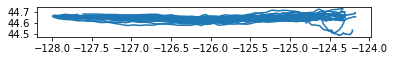

In [5]:
ooinhdeepsections_gdf.plot()

In [6]:
len(ooinhdeepsections_gdf)

37

In [7]:
ooinhdeepsections_gdf.head()

,id,datetime_start,datetime_end,direction,dive_nbr_start,dive_nbr_end,glider_id,deployment_id,data_label,data_url,geometry
0,ce383_Feb20_s005,2020-04-07T21:27:06,2020-04-08T21:38:01,Westward,759,827,ce383,ce383_Feb20,Glider DAC,https://gliders.ioos.us/erddap/tabledap/ce_383...,"LINESTRING (-124.30895 44.65061, -124.30634 44..."
1,ce383_Feb20_s004,2020-03-26T10:04:47,2020-04-07T21:12:25,Eastward,576,758,ce383,ce383_Feb20,Glider DAC,https://gliders.ioos.us/erddap/tabledap/ce_383...,"LINESTRING (-127.93011 44.65219, -127.89290 44..."
2,ce383_Feb20_s003,2020-03-15T19:13:39,2020-03-26T06:49:03,Westward,479,575,ce383,ce383_Feb20,Glider DAC,https://gliders.ioos.us/erddap/tabledap/ce_383...,"LINESTRING (-124.57727 44.65980, -124.58614 44..."
3,ce383_Feb20_s002,2020-03-04T12:27:04,2020-03-15T18:26:26,Eastward,372,478,ce383,ce383_Feb20,Glider DAC,https://gliders.ioos.us/erddap/tabledap/ce_383...,"LINESTRING (-127.91776 44.65940, -127.87003 44..."
4,ce383_Feb20_s001,2020-02-20T21:44:09,2020-03-04T08:57:11,Westward,1,371,ce383,ce383_Feb20,Glider DAC,https://gliders.ioos.us/erddap/tabledap/ce_383...,"LINESTRING (-124.21416 44.54031, -124.21445 44..."


In [8]:
trinidadsections_gdf = gpd.read_file(dpath / 'trinidad-sections_geo.json')

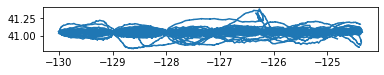

In [9]:
trinidadsections_gdf.plot()

In [10]:
len(trinidadsections_gdf)

55

In [11]:
trinidadsections_gdf.head()

,id,datetime_start,datetime_end,direction,dive_nbr_start,dive_nbr_end,glider_id,deployment_id,geometry
0,Sep19_s006,2020-01-31T23:40:01,2020-03-02T12:25:25,Eastward,580,694,uw157,Sep19,"LINESTRING (-130.01698 41.05910, -130.01634 41..."
1,Sep19_s005,2020-01-02T06:29:32,2020-01-31T23:40:01,Westward,465,579,uw157,Sep19,"LINESTRING (-124.36099 41.06173, -124.36108 41..."
2,Sep19_s004,2019-12-06T06:27:31,2020-01-02T06:29:32,Eastward,358,464,uw157,Sep19,"LINESTRING (-129.98174 41.07565, -129.98237 41..."
3,Sep19_s003,2019-11-13T05:27:01,2019-12-06T06:27:31,Westward,261,357,uw157,Sep19,"LINESTRING (-124.34712 41.05872, -124.34728 41..."
4,Sep19_s002,2019-10-13T21:01:37,2019-11-13T05:27:01,Eastward,127,260,uw157,Sep19,"LINESTRING (-130.00545 41.07742, -130.00545 41..."


In [19]:
def explode_to_pointsgdf(ingdf):
    linesgdf = ingdf.copy()
    linesgdf['points'] = linesgdf.apply(lambda x: [y for y in x['geometry'].coords], axis=1)
    linesdf = pd.DataFrame(linesgdf.drop(columns='geometry'), copy=True)
    
    pointsdf = linesdf.explode('points').reset_index(drop=True)
    # index=pointsdf.index might not be needed ...
    pointsdf[['longitude', 'latitude']] = pd.DataFrame(pointsdf['points'].tolist(), index=pointsdf.index)
    pointsdf.drop(columns='points', inplace=True)
    pointsgdf = gpd.GeoDataFrame(pointsdf, geometry=gpd.points_from_xy(pointsdf['longitude'], pointsdf['latitude']))
    
    return pointsgdf

In [20]:
ooinhdeeppoints_gdf = explode_to_pointsgdf(ooinhdeepsections_gdf)

In [21]:
len(ooinhdeeppoints_gdf)

5046

In [22]:
ooinhdeeppoints_gdf.head()

,id,datetime_start,datetime_end,direction,dive_nbr_start,dive_nbr_end,glider_id,deployment_id,data_label,data_url,longitude,latitude,geometry
0,ce383_Feb20_s005,2020-04-07T21:27:06,2020-04-08T21:38:01,Westward,759,827,ce383,ce383_Feb20,Glider DAC,https://gliders.ioos.us/erddap/tabledap/ce_383...,-124.30895,44.65061,POINT (-124.30895 44.65061)
1,ce383_Feb20_s005,2020-04-07T21:27:06,2020-04-08T21:38:01,Westward,759,827,ce383,ce383_Feb20,Glider DAC,https://gliders.ioos.us/erddap/tabledap/ce_383...,-124.30634,44.65065,POINT (-124.30634 44.65065)
2,ce383_Feb20_s005,2020-04-07T21:27:06,2020-04-08T21:38:01,Westward,759,827,ce383,ce383_Feb20,Glider DAC,https://gliders.ioos.us/erddap/tabledap/ce_383...,-124.31882,44.64663,POINT (-124.31882 44.64663)
3,ce383_Feb20_s005,2020-04-07T21:27:06,2020-04-08T21:38:01,Westward,759,827,ce383,ce383_Feb20,Glider DAC,https://gliders.ioos.us/erddap/tabledap/ce_383...,-124.32215,44.64606,POINT (-124.32215 44.64606)
4,ce383_Feb20_s005,2020-04-07T21:27:06,2020-04-08T21:38:01,Westward,759,827,ce383,ce383_Feb20,Glider DAC,https://gliders.ioos.us/erddap/tabledap/ce_383...,-124.32525,44.64547,POINT (-124.32525 44.64547)


In [33]:
ooinhdeeppoints_gdf.drop(columns='data_label').to_file(
    dpath / 'ooinhdeep_points.geojson', driver='GeoJSON'
)

In [15]:
pwd

'/usr/mayorgadat/workmain/acoustics/gh/OSOceanAcoustics/saildrone_test'